This notebook will use the other programs in the 'Optimizations' project to benchmark different methods of creating efficiency in programming. To do this each program will be called 20 times and the average execution time of the 500x500 multiplicaiton will be generated and compared.

In [1]:
#import the python function.  All others are executables
import p_matmul_cpu
import subprocess
import statistics
import matplotlib.pyplot as plt

In [2]:
python_cpu_times = [] #Seconds
c_cpu_times = [] #Seconds
c_omp_times = [] #Seconds
cuda_times = [] #Milliseconds

In [3]:
for i in range(20): #Generate python cpu times
    python_cpu_times += [p_matmul_cpu.main()]

In [4]:
for i in range(20): #Generate C cpu times
    c_cpu_times += [float(subprocess.run('c_matmul_cpu', capture_output = True).stdout)]

In [5]:
for i in range(20): #Generate C multithread times
    c_omp_times += [float(subprocess.run('matmul_omp', capture_output = True).stdout)]

In [6]:
for i in range(20): #Generate GPU times
    cuda_times += [float(subprocess.run('matmul_cuda', capture_output = True).stdout)]

In [7]:
#Standardize all results as milliseconds
python_cpu_times = [x * 1000 for x in python_cpu_times]
c_cpu_times = [x * 1000 for x in c_cpu_times]
c_omp_times = [x * 1000 for x in c_omp_times]

In [8]:
py_avg = statistics.mean(python_cpu_times)
c_cpu_avg = statistics.mean(c_cpu_times)
c_omp_avg = statistics.mean(c_omp_times)
cuda_avg = statistics.mean(cuda_times)

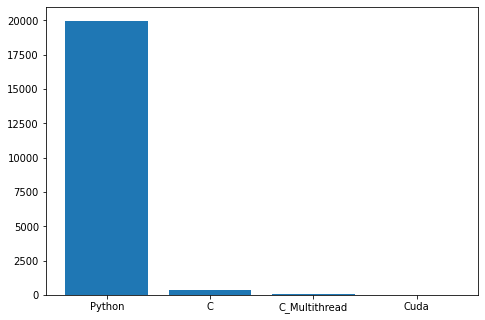

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Python', 'C', 'C_Multithread', 'Cuda']
times = [py_avg, c_cpu_avg, c_omp_avg, cuda_avg]
ax.bar(langs,times)
plt.show()

In [10]:
print("Python mean time in milliseconds: ", py_avg)
print("C mean time in milliseconds: ", c_cpu_avg)
print("C multithread mean time in milliseconds: ", c_omp_avg)
print("Cuda mean time in milliseconds: ",cuda_avg)

Python mean time in milliseconds:  19976.050579547882
C mean time in milliseconds:  392.4
C multithread mean time in milliseconds:  81.25
Cuda mean time in milliseconds:  0.0526624


As this demonstrates the difference between a python implementation of matrix multiplication and any other implementation is significant.  While the python solution is acceptable for smaller matrices this example clearly demonstrates the innefficiency of python when compared to C.  It also serves to highlight a similar difference in efficiency between processing on the CPU and processing on the GPU.  